<a href="https://colab.research.google.com/github/soil7/ICS-Assignment-1/blob/main/Copy_of_ICS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader

In [ ]:
# 1. Transform: Convert image to tensor and normalize to [0, 1]
transform = transforms.ToTensor()

# 2. Load training+validation and test datasets
train_val_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform
)


In [ ]:
from torch.utils.data import DataLoader, random_split

# Split 80% for training, 20% for validation
train_size = int(0.8 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size

# Randomly split the training data
train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])

# Create DataLoaders (used for feeding data into the model)
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # shuffle=True = better training
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class UniqueCNN(nn.Module):
    def __init__(self):
        super(UniqueCNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(16)  # 🔹 Normalize output of conv1

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # 🔹 Normalize output of conv2

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.4)

        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # conv1 -> BN -> ReLU -> pool
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # conv2 -> BN -> ReLU -> pool
        x = x.view(-1, 32 * 7 * 7)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

import torch

model = UniqueCNN()

# Loss Function: CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 1: Loss = 0.4834
Epoch 2: Loss = 0.3375
Epoch 3: Loss = 0.2969
Epoch 4: Loss = 0.2717
Epoch 5: Loss = 0.2540
Epoch 6: Loss = 0.2374
Epoch 7: Loss = 0.2224
Epoch 8: Loss = 0.2104
Epoch 9: Loss = 0.1981
Epoch 10: Loss = 0.1908


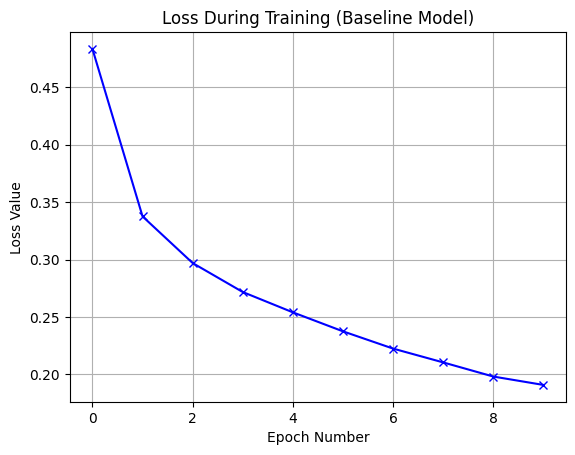

In [ ]:
import torch
import matplotlib.pyplot as plt

# Check if CUDA is available and assign device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Send the model to the selected device (GPU or CPU)
model = model.to(device)

num_epochs = 10
train_losses = []

for ep in range(num_epochs):
    model.train()
    total_loss = 0

    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        predictions = model(x_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg = total_loss / len(train_loader)
    train_losses.append(avg)
    print(f"Epoch {ep+1}: Loss = {avg:.4f}")
# Plot training loss across epochs
plt.plot(train_losses, marker='x', linestyle='-', color='b')
plt.title('Loss During Training (Baseline Model)')
plt.xlabel('Epoch Number')
plt.ylabel('Loss Value')
plt.grid(True)
plt.show()

Final test set accuracy: 90.77 percent


<Figure size 700x500 with 0 Axes>

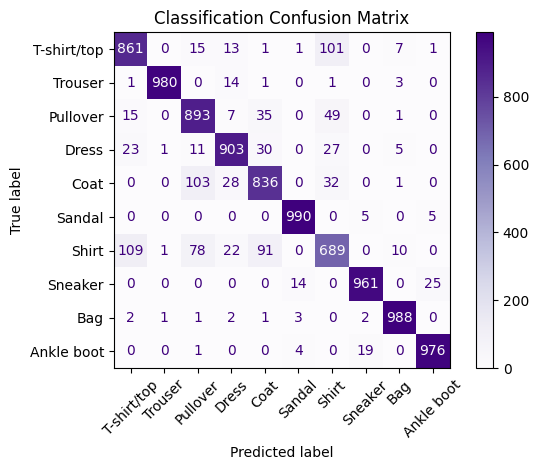

In [ ]:
model.eval()
correct_preds = 0
total_preds = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions = outputs.argmax(dim=1)
        correct_preds += (predictions == targets).sum().item()
        total_preds += targets.size(0)

acc = 100 * correct_preds / total_preds
print(f"Final test set accuracy: {acc:.2f} percent")


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
model.eval()
y_pred_all = []
y_true_all = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        logits = model(inputs)
        predictions = logits.max(1)[1]
        y_pred_all.extend(predictions.cpu().tolist())
        y_true_all.extend(targets.cpu().tolist())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_result = confusion_matrix(y_true_all, y_pred_all)

# Create display object
matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_result, display_labels=test_dataset.classes)

# Plot the confusion matrix with a custom look
plt.figure(figsize=(7, 5))
matrix_display.plot(cmap="Purples", xticks_rotation=45)
plt.title("Classification Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class UniqueCNN(nn.Module):
    def __init__(self):
        super(UniqueCNN, self).__init__()

        # 1st convolutional block
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(16)

        # 2nd convolutional block
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        # ✅ 3rd convolutional block (added here)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.4)

        # After 3 poolings: 28 → 14 → 7 → 3
        self.fc1 = nn.Linear(64 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # 28x28 -> 14x14
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # 14x14 -> 7x7
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # 7x7 -> 3x3
        x = x.view(-1, 64 * 3 * 3)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x



Epoch 1: Loss = 0.1793
Epoch 2: Loss = 0.1708
Epoch 3: Loss = 0.1639
Epoch 4: Loss = 0.1536
Epoch 5: Loss = 0.1457
Epoch 6: Loss = 0.1431
Epoch 7: Loss = 0.1347
Epoch 8: Loss = 0.1262
Epoch 9: Loss = 0.1266
Epoch 10: Loss = 0.1216


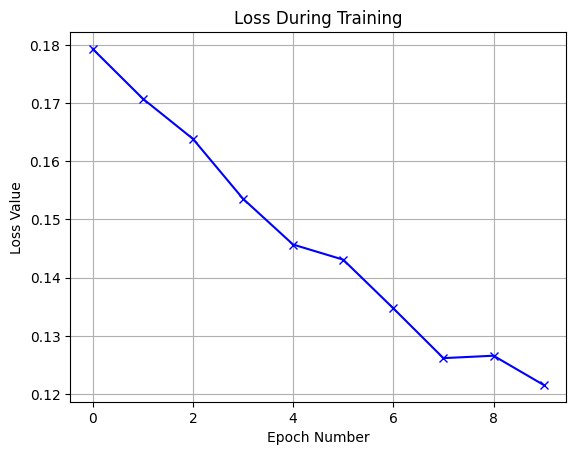

In [ ]:
import torch
import matplotlib.pyplot as plt

# Check if CUDA is available and assign device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Send the model to the selected device (GPU or CPU)
model = model.to(device)

num_epochs = 10
train_losses = []

for ep in range(num_epochs):
    model.train()
    total_loss = 0

    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        predictions = model(x_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg = total_loss / len(train_loader)
    train_losses.append(avg)
    print(f"Epoch {ep+1}: Loss = {avg:.4f}")
# Plot training loss across epochs
plt.plot(train_losses, marker='x', linestyle='-', color='b')
plt.title('Loss During Training')
plt.xlabel('Epoch Number')
plt.ylabel('Loss Value')
plt.grid(True)
plt.show()




Final test set accuracy: 91.06 percent


<Figure size 700x500 with 0 Axes>

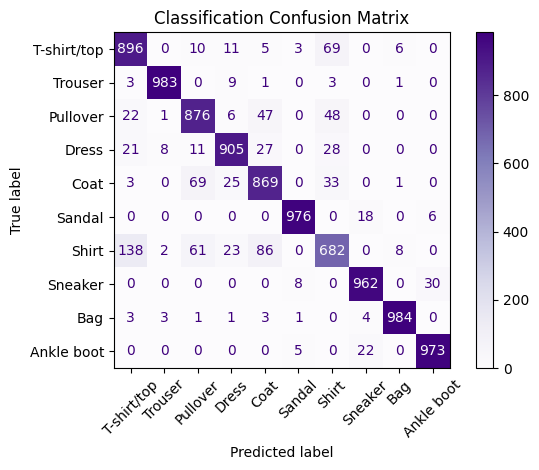

In [ ]:
model.eval()
correct_preds = 0
total_preds = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions = outputs.argmax(dim=1)
        correct_preds += (predictions == targets).sum().item()
        total_preds += targets.size(0)

acc = 100 * correct_preds / total_preds
print(f"Final test set accuracy: {acc:.2f} percent")


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
model.eval()
y_pred_all = []
y_true_all = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        logits = model(inputs)
        predictions = logits.max(1)[1]
        y_pred_all.extend(predictions.cpu().tolist())
        y_true_all.extend(targets.cpu().tolist())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_result = confusion_matrix(y_true_all, y_pred_all)

# Create display object
matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_result, display_labels=test_dataset.classes)

# Plot the confusion matrix with a custom look
plt.figure(figsize=(7, 5))
matrix_display.plot(cmap="Purples", xticks_rotation=45)
plt.title("Classification Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])



In [ ]:
# 1. Transform: Convert image to tensor and normalize to [0, 1]

# 2. Load training+validation and test datasets
train_val_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform
)


In [ ]:
from torch.utils.data import DataLoader, random_split

# Split 80% for training, 20% for validation
train_size = int(0.8 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size

# Randomly split the training data
train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])

# Create DataLoaders (used for feeding data into the model)
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # shuffle=True = better training
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class UniqueCNN(nn.Module):
    def __init__(self):
        super(UniqueCNN, self).__init__()

        # 1st convolutional block
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(16)

        # 2nd convolutional block
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        # ✅ 3rd convolutional block (added here)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.4)

        # After 3 poolings: 28 → 14 → 7 → 3
        self.fc1 = nn.Linear(64 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # 28x28 -> 14x14
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # 14x14 -> 7x7
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # 7x7 -> 3x3
        x = x.view(-1, 64 * 3 * 3)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x



Epoch 1: Loss = 0.4101
Epoch 2: Loss = 0.3235
Epoch 3: Loss = 0.3034
Epoch 4: Loss = 0.2920
Epoch 5: Loss = 0.2799
Epoch 6: Loss = 0.2728
Epoch 7: Loss = 0.2677
Epoch 8: Loss = 0.2633
Epoch 9: Loss = 0.2561
Epoch 10: Loss = 0.2529


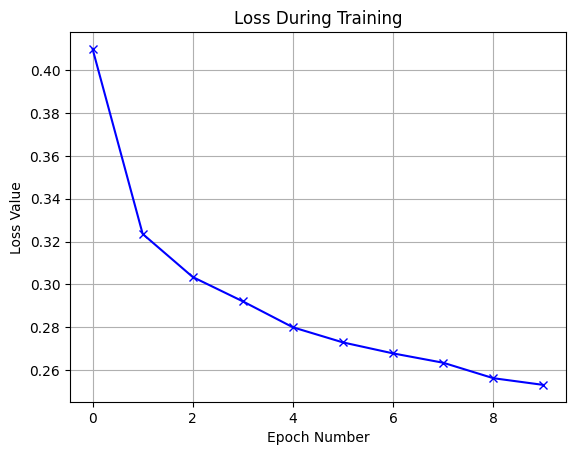

In [ ]:
import torch
import matplotlib.pyplot as plt

# Check if CUDA is available and assign device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Send the model to the selected device (GPU or CPU)
model = model.to(device)

num_epochs = 10
train_losses = []

for ep in range(num_epochs):
    model.train()
    total_loss = 0

    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        predictions = model(x_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg = total_loss / len(train_loader)
    train_losses.append(avg)
    print(f"Epoch {ep+1}: Loss = {avg:.4f}")
# Plot training loss across epochs
plt.plot(train_losses, marker='x', linestyle='-', color='b')
plt.title('Loss During Training')
plt.xlabel('Epoch Number')
plt.ylabel('Loss Value')
plt.grid(True)
plt.show()




Final test set accuracy: 89.99 percent


<Figure size 700x500 with 0 Axes>

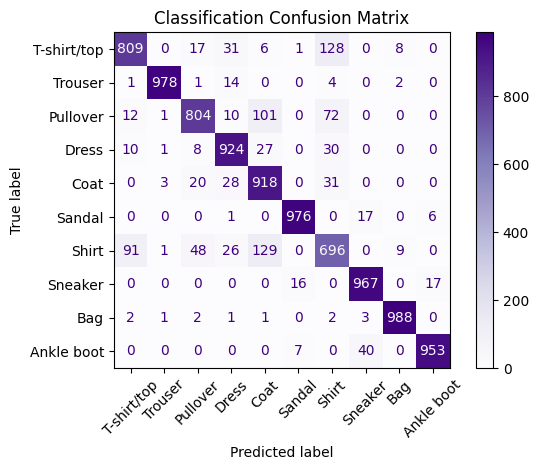

In [ ]:
model.eval()
correct_preds = 0
total_preds = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions = outputs.argmax(dim=1)
        correct_preds += (predictions == targets).sum().item()
        total_preds += targets.size(0)

acc = 100 * correct_preds / total_preds
print(f"Final test set accuracy: {acc:.2f} percent")


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
model.eval()
y_pred_all = []
y_true_all = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        logits = model(inputs)
        predictions = logits.max(1)[1]
        y_pred_all.extend(predictions.cpu().tolist())
        y_true_all.extend(targets.cpu().tolist())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_result = confusion_matrix(y_true_all, y_pred_all)

# Create display object
matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_result, display_labels=test_dataset.classes)

# Plot the confusion matrix with a custom look
plt.figure(figsize=(7, 5))
matrix_display.plot(cmap="Purples", xticks_rotation=45)
plt.title("Classification Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

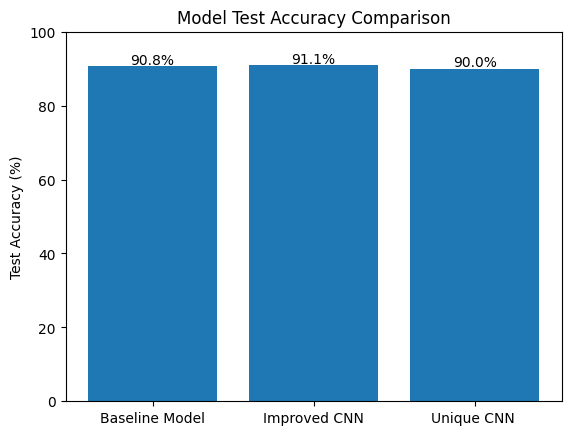

In [ ]:
import matplotlib.pyplot as plt

# Replace these with your actual test accuracy values
Base_model = 90.77  # Baseline Model
Model1 = 91.06  # Model 1
Model2 = 89.99  # Model 2

# Labels and values
models = ['Baseline Model', 'Improved CNN', 'Unique CNN ']
accuracies = [Base_model, Model1, Model2]

# Plot
plt.bar(models, accuracies)
plt.ylabel('Test Accuracy (%)')
plt.title('Model Test Accuracy Comparison')

# Add values on top of bars
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.5, f'{accuracies[i]:.1f}%', ha='center')

plt.ylim(0, 100)
plt.show()

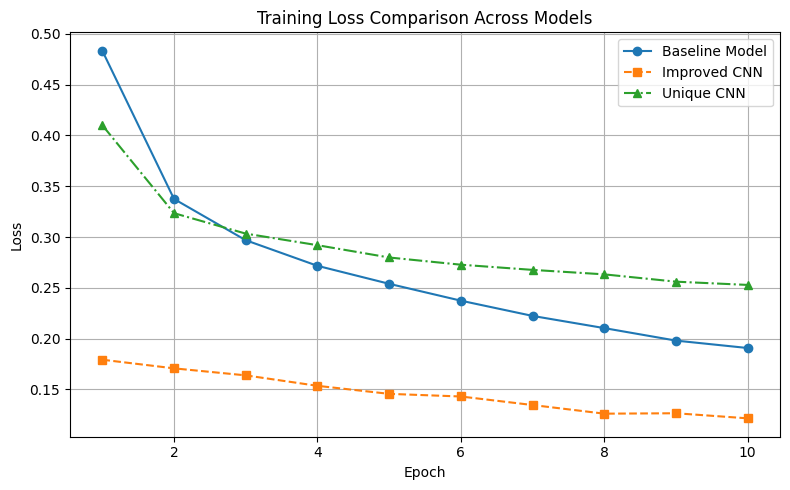

In [ ]:
import matplotlib.pyplot as plt

# Updated loss values (from your message)
loss_baseline = [0.4834, 0.3375, 0.2969, 0.2717, 0.2540, 0.2374, 0.2224, 0.2104, 0.1981, 0.1908]
loss_model1   = [0.1793, 0.1708, 0.1639, 0.1536, 0.1457, 0.1431, 0.1347, 0.1262, 0.1266, 0.1216]
loss_model2   = [0.4101, 0.3235, 0.3034, 0.2920, 0.2799, 0.2728, 0.2677, 0.2633, 0.2561, 0.2529]

epochs = list(range(1, 11))  # 10 epochs

# Plotting the losses
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss_baseline, label='Baseline Model', marker='o', linestyle='-')
plt.plot(epochs, loss_model1, label='Improved CNN', marker='s', linestyle='--')
plt.plot(epochs, loss_model2, label='Unique CNN', marker='^', linestyle='-.')

# Labels and title
plt.title('Training Loss Comparison Across Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()